# Understanding the Objective of the problem
### The goal is to predict the salary of different jobs in data field, based on location, company rating, and job title

### Importing the data set

In [1]:
# from google.colab import files  # If someone wants to use google colaboratory

In [2]:
# uploaded = files.upload()  # If someone wants to use google colaboratory

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import pickle

### Reading the data

In [2]:
df_raw = pd.read_csv('df.csv')

### Data Understanding

In [3]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


Key observations emerge from the data:

1. Job titles can be grouped based on common keywords such as "Director," "Data Analyst," and similar terms.
2. The minimum and maximum salaries listed in the salary estimate column can be extracted and averaged to create a new "Average Salary" column, which will serve as our response variable.
3. Company names are unlikely to significantly impact the analysis and can be disregarded.
4. The state for each position can be identified and extracted from the location column.
5. Due to the large number of unknown values in the Revenue column, we will exclude it from the analysis.

### assessing the data

In this section, we will examine the raw data to gain a clearer understanding of its structure and the type of information it contains.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


### Data Cleaning


- Created columns for the minimum and maximum salaries for each position by parsing the relevant values from the raw data.
- Added an average salary column calculated from the minimum and maximum salaries.
- Extracted the state for each position and created a corresponding "State" column.
- Created a "Title" column to categorize the posted roles into groups such as Data Engineer, Deep Learning, Analyst, etc.

In [5]:
  # Remove instances without acceptable salary estimates
  df = df_raw[df_raw['Salary Estimate'] != '-1']

In [6]:
 # Remove Per Hour salary
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [7]:
  # Remove $
  df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$', ' '))

In [8]:
  # Remove K
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))

In [9]:
#Split it
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

In [10]:
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

In [11]:
  # Cast Min_salary and Max_salary to int and get the avrage salary
df['Min_salary'] = df['Min_salary'].apply(lambda x:int(x))
df['Max_salary']=df['Max_salary'].astype(int)
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [12]:
 # Create State column

df['State'] = df['Location'].apply(lambda x: x.split()[-1])

 # Remove instances with Kingdom as the state
df = df[df.State != 'Kingdom']


In [13]:
def title_organizer(x):
        """
        This function organizes the job title
        """
        x = x.lower()
        if ('data scientist' in x) or ('data science' in x) :
            return 'data scientist'
        elif 'data engineer' in x:
            return 'data engineer'
        elif 'deep learning' in x:
            return 'deep learning engineer'
        elif 'machine learning' in x:
            return 'machine learning engineer'
        elif 'director' in x:
            return 'director'
        elif 'manager' in x:
            return 'manager'
        elif 'analyst' in x:
            return 'analyst'
        elif 'researcher' in x:
            return 'researcher'
        else:
            return 'other'

In [14]:
 # Categorize Job Titles
df['Job Title'] = df['Job Title'].apply(title_organizer)

In [15]:
 # Remove unacceptable Ratings
df = df[df['Rating']!=-1]

In [16]:
cleaned_df = df[['Job Title', 'Rating', 'Average_salary', 'State']]

In [17]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


### Exploratory Data Analysis (EDA)

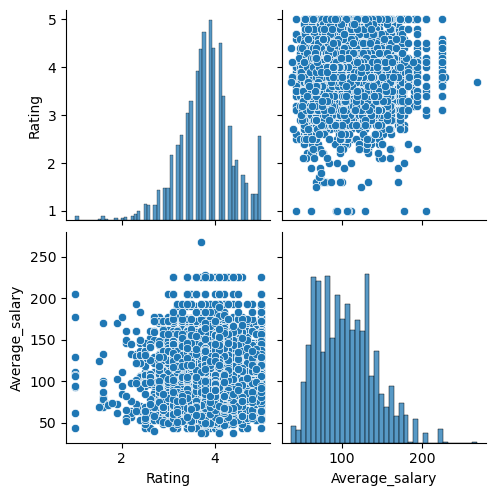

In [18]:
sns.pairplot(cleaned_df)

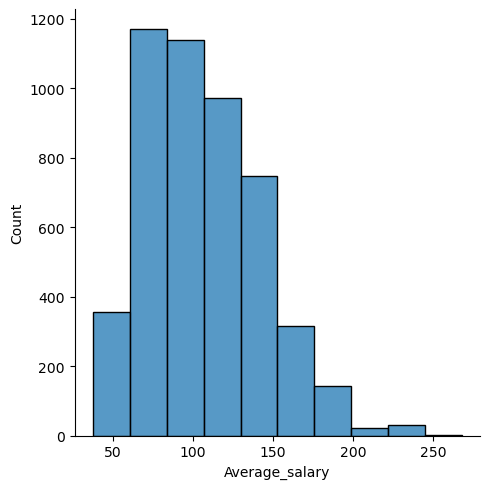

In [19]:
sns.displot(x='Average_salary', data= cleaned_df, bins = 10)

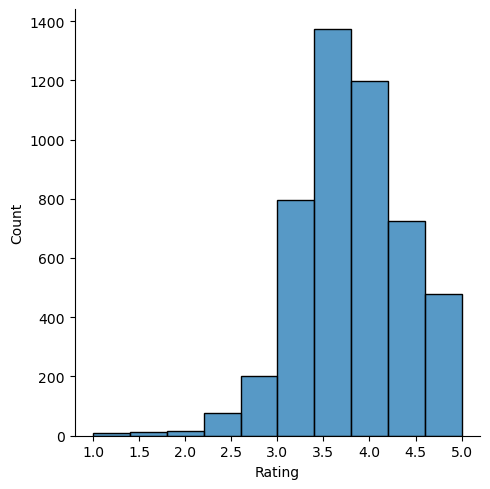

In [20]:
sns.displot(x='Rating', data= cleaned_df, bins = 10)

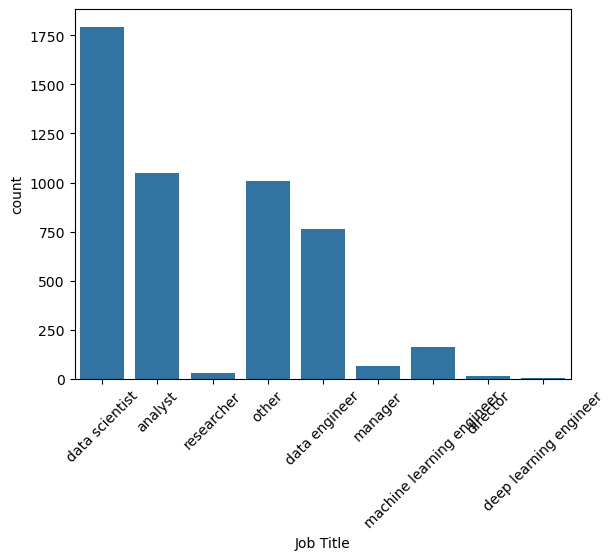

In [30]:
sns.countplot(x='Job Title', data= cleaned_df)
plt.xticks(rotation= 45)
plt.show()

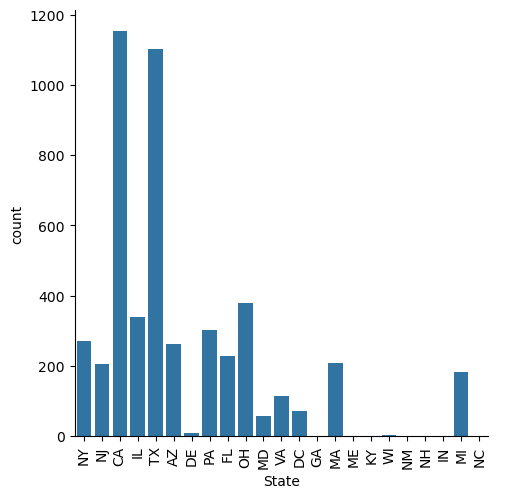

In [33]:
sns.catplot(x="State" , data=cleaned_df , kind ="count")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Rating', ylabel='Average_salary'>

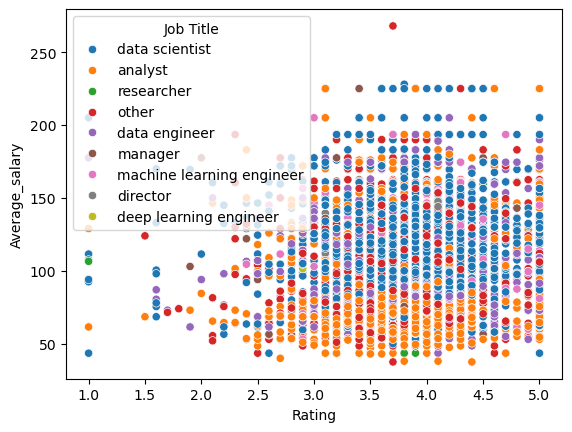

In [32]:
sns.scatterplot(x='Rating', y='Average_salary', data= cleaned_df, hue='Job Title')

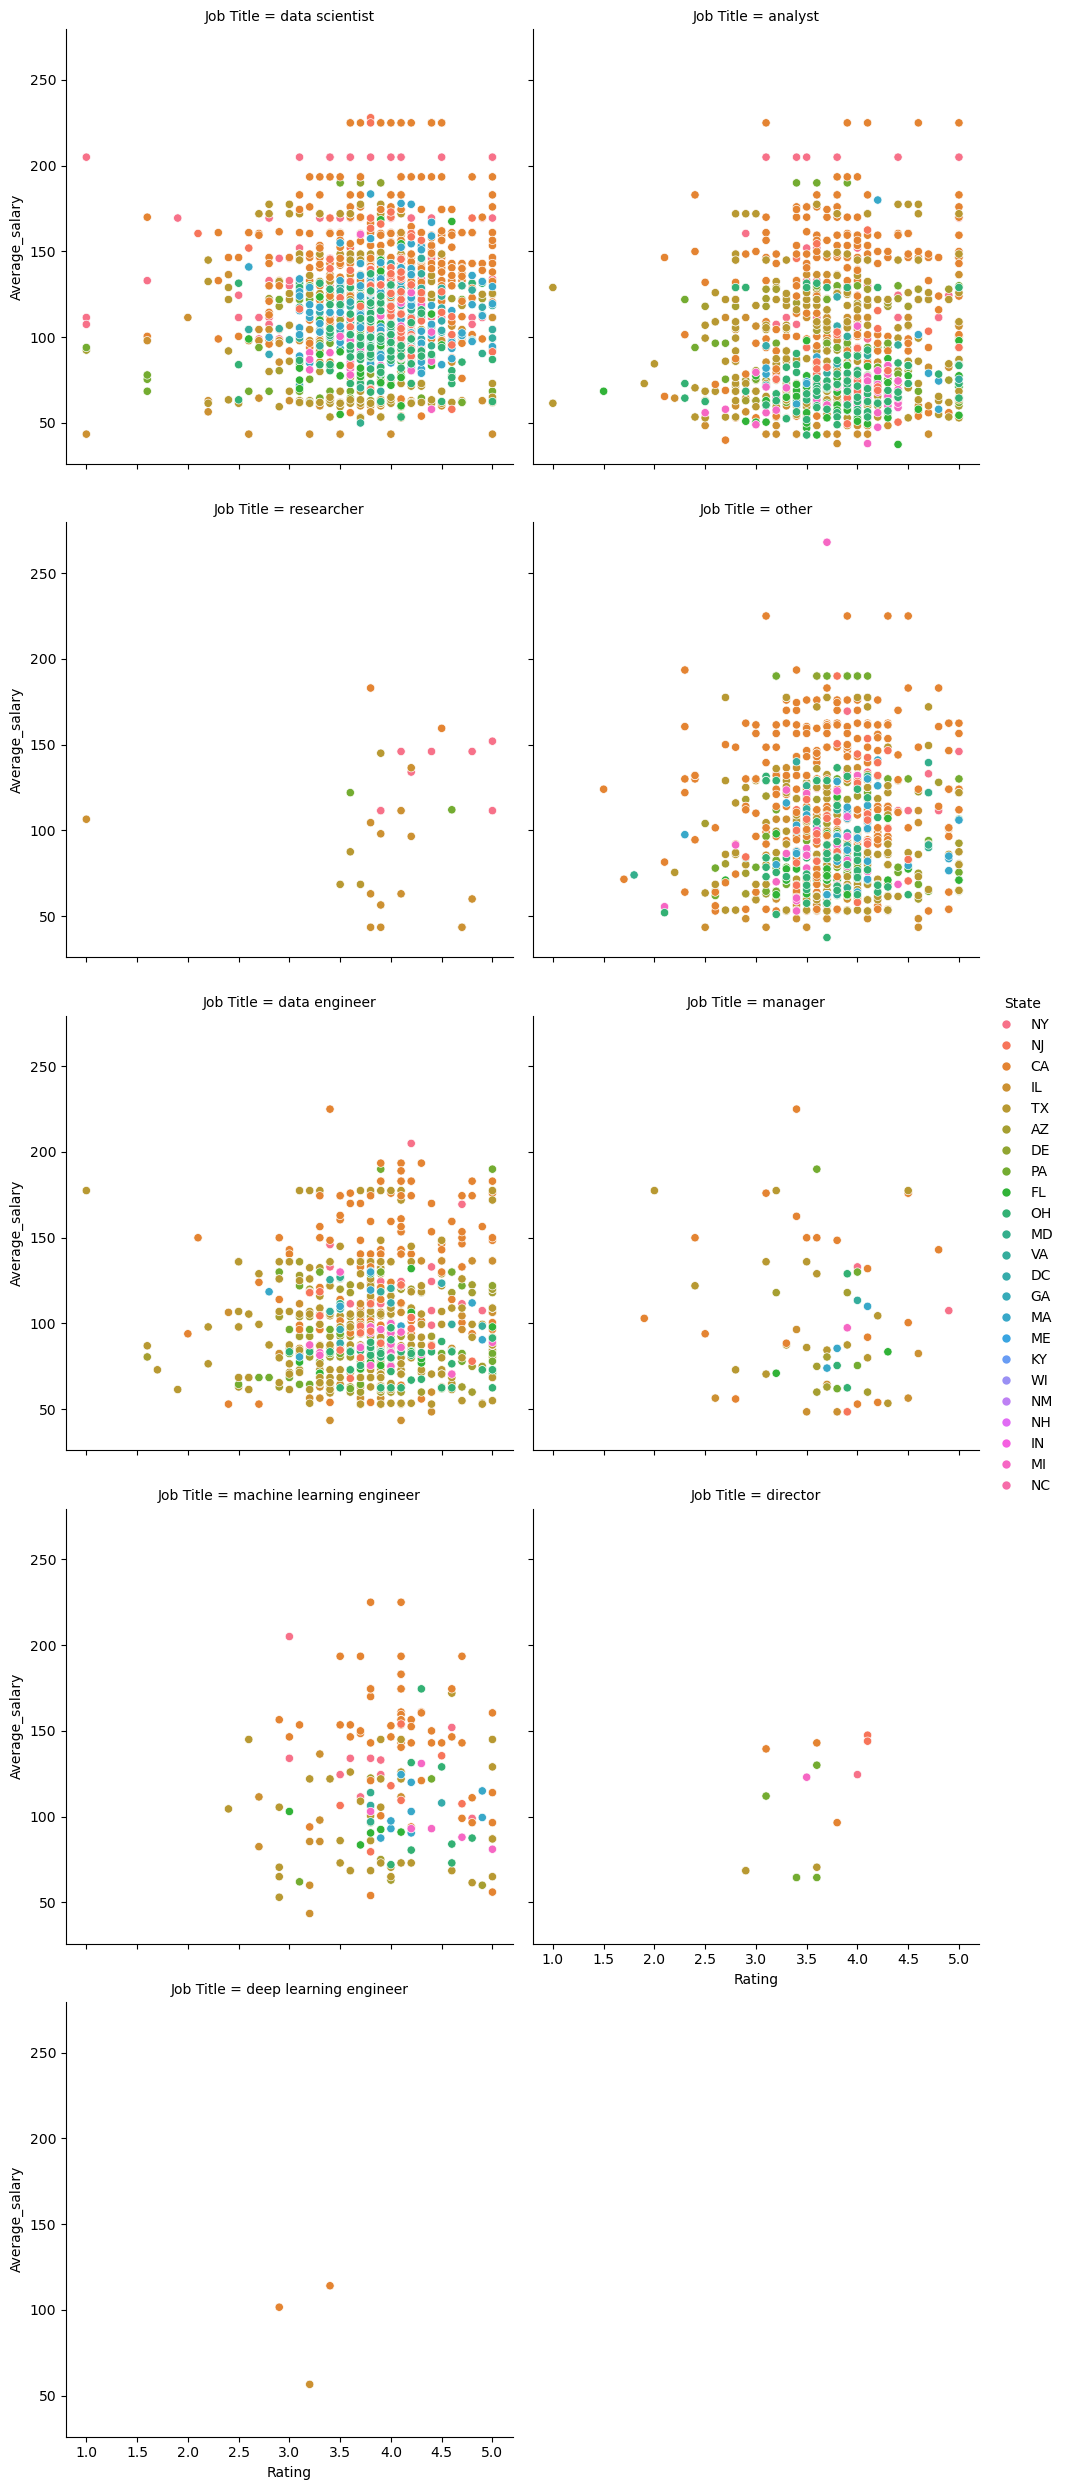

In [34]:
sns.relplot(x="Rating" , y="Average_salary" , data=cleaned_df , hue="State" , col="Job Title" , col_wrap = 2 )
plt.show()

### Feature Engineering

In [35]:
preprocessed_df = pd.get_dummies(cleaned_df, columns=['Job Title','State'] , dtype = int)

In [36]:
X = preprocessed_df.drop(columns='Average_salary')

In [37]:
y = preprocessed_df['Average_salary']

### Modeling

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
# print the intercept(b0)
print(lr.intercept_)

225856868278739.3


In [42]:
# print the coefficients(b1, b2, ...)
print(lr.coef_)

[ 2.19994382e+00 -1.59466397e+14 -1.59466397e+14 -1.59466397e+14
 -1.59466397e+14 -1.59466397e+14 -1.59466397e+14 -1.59466397e+14
 -1.59466397e+14 -1.59466397e+14 -6.63904717e+13 -6.63904717e+13
 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13
 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13
 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13
 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13
 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13 -6.63904717e+13
 -6.63904717e+13]


In [43]:
# Prediction
predictions = lr.predict(X_test)
predictions

array([ 93.4375 , 124.5    ,  89.5    , ...,  83.625  ,  91.875  ,
        92.46875])

<Axes: xlabel='Average_salary'>

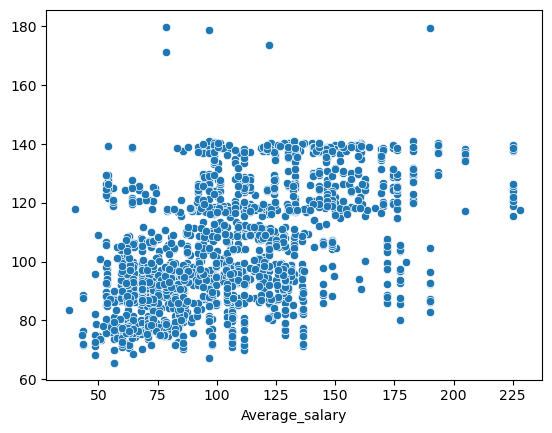

In [44]:
sns.scatterplot(x=y_test, y=predictions)

In [45]:
residual= y_test-predictions

C:\Users\Hamideh\AppData\Local\Temp\ipykernel_19024\371796358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,bins=50);


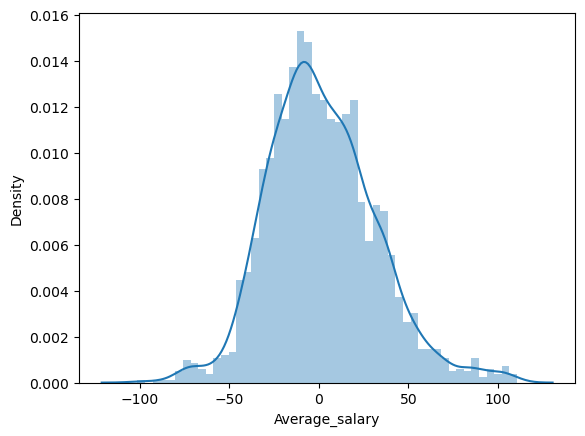

In [48]:
sns.distplot(residual,bins=50);
plt.show()

In [49]:
print('MAE:', mean_absolute_error(y_test, predictions))


MAE: 23.6811286407767


### Save the Model

In [50]:
pickle.dump(lr, open('Salary_Estimater.pkl' , 'wb'))